[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


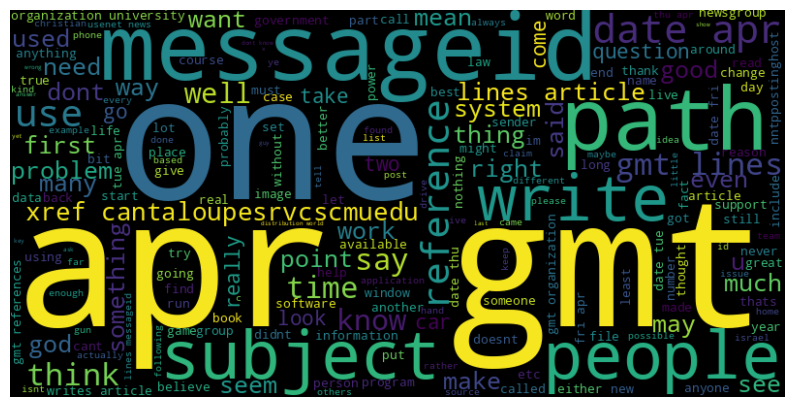

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
df = pd.read_csv('blogs.csv')

# Explore the dataset
print(df.head())
print(df.info())

# Data cleaning: Remove punctuation, convert to lowercase, and tokenize
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function to the text column
df['cleaned_text'] = df['Data'].apply(clean_text)

# Visualize a word cloud of the most frequent words in the text column
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

# Label encoding for the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.8225

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.8

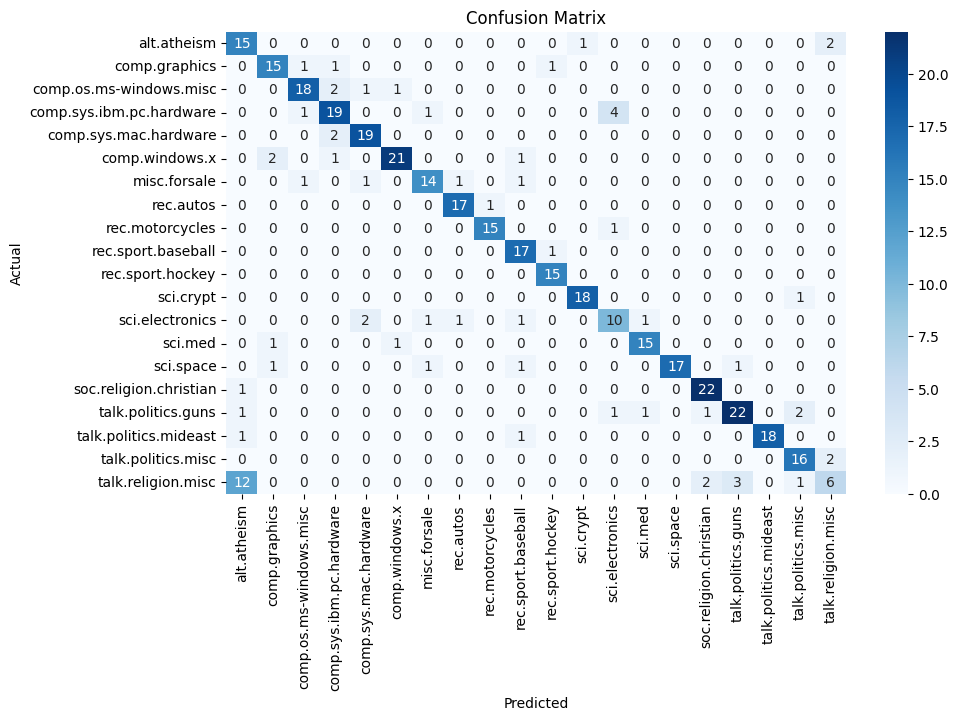

In [ ]:
# Initialize the Naive Bayes classifier (MultinomialNB for text classification)
naive_bayes = MultinomialNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix (optional)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Distribution:
sentiment
positive    1356
negative     581
neutral       63
Name: count, dtype: int64


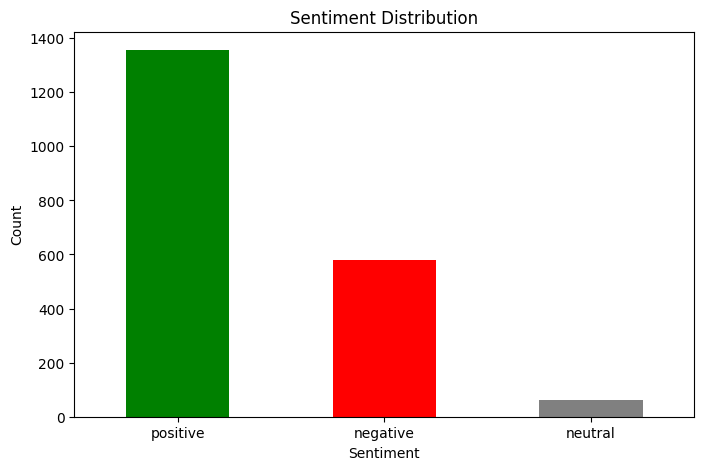

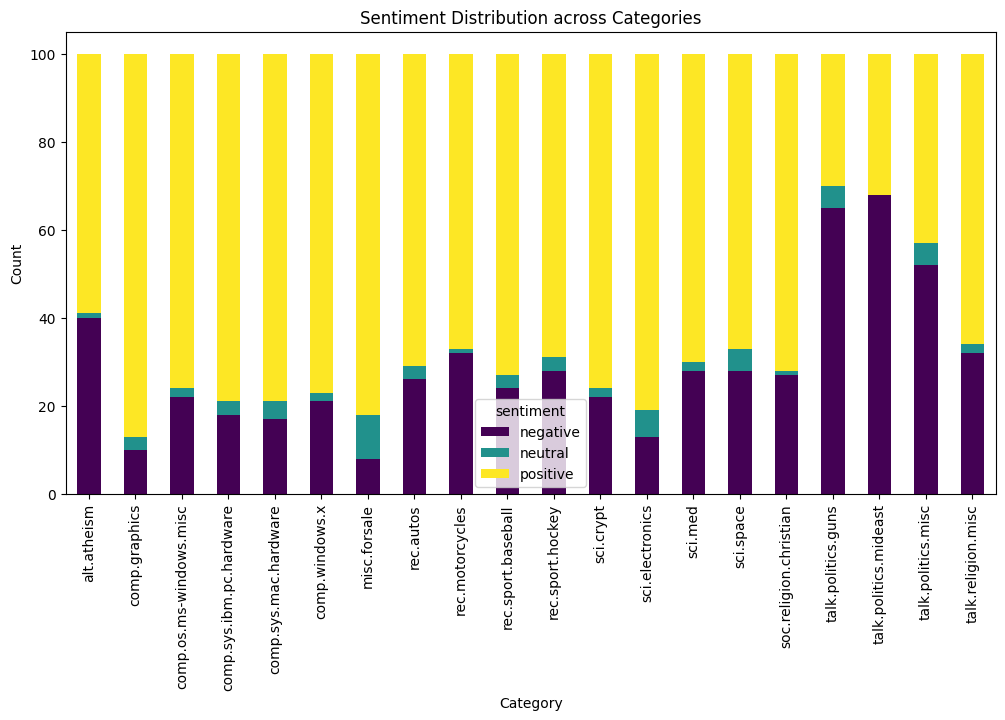

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to determine the sentiment (positive, negative, or neutral)
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the cleaned text column
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(f'Sentiment Distribution:\n{sentiment_counts}')

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Examine the sentiment distribution across categories
category_sentiment = pd.crosstab(df['Labels'], df['sentiment'])
category_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Challenges and Improvements
Data Imbalance: If the dataset is imbalanced across categories, we could try techniques like SMOTE or class weights in Naive Bayes to improve performance for underrepresented categories.
Feature Engineering: You can experiment with additional features such as bigrams or trigrams, or you could fine-tune the TF-IDF parameters like n-grams and max_df to improve the text representation.

### Conclusion
Text Classification: We successfully built a Naive Bayes classifier to categorize blog posts into different categories. The MultinomialNB classifier performed well after text preprocessing and feature extraction via TF-IDF.

Sentiment Analysis: Using VADER, we conducted sentiment analysis on the blog posts and visualized sentiment distributions across categories. This gave insights into the emotional tone of the blog posts.